# **Homework 7**

Due Wednesday April, 22 at 2:30pm
Submit an ipynb file to gradescope. 



Load packages we will use.



In [4]:
#math
import numpy as np
import random

#dataframes
import pandas as pd

#ploting
import matplotlib.pyplot as plt

#regression tools
import statsmodels.api as sm
from patsy import dmatrices

## Problem 1: Covariance

Given a dataset defined as:



```
episilon = st.normal.random(3)

u1 = epsilon[1]
u2 = epsilon[2] + u1
u3 = epsilon[3] + u2
```

Hint: Recall the following facts about variance and covariance:

$Var[A] = Cov(A,A)$

$Cov[A + B,C] = Cov[A,C] + Cov[B,C]$

$Cov[a\times A,B] = a\times Cov[A,B]$    if *a* is deterministic

$Cov[A,B] = 0$   if A and B are independent

a. Calculate the variance of u3

Ans: 3

b. Calculate the covariance between u2 and u3

Ans: cov(u2, u3) = var(u2) + cov(e1, e3) + cov(e2, e3) = var(u2) = 2

c. Calculate the covariance between u2 and epsilon[2]

Ans: cov(u2, e2) = cov(e2, e2) + cov(e1, e2)

                 = var(e2) + 0 = 1

##Problem 2: Linear Models

For each of the linear models below, answer the following questions: 
* Is the model linear in the parameters?
* If the model is not linear in the parameters, can it be transformed into a model that is linear? If yes, provide the transformed model. 

a. $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_1^2 + \beta_3X_2$

Ans: Yes

b. $Y = \beta_0 + \beta_1 X_1 + (\beta_2 X_1)^2 + \beta_3\beta_4X_2$

Ans: No, but it can be transformed to be linear by setting B' = (B_2)^2

c. $Y = \beta_0 + \beta_1 X_1\log(X_2)$

Ans: Yes

d. $Y = \beta_0 + X_1\log(\beta_1X_2)$ 

Ans: No, but it can be transformed to linear by setting B' = log(B_1)

## Problem 3: Generating Error

Write Python code that produces an array called `epsilon` of length 10000 for which `plt.acorr(epsilon)`, the plot of correlation between values, produces a plot with a correlation above 0.25 at lags 0,1 and 2, and has a correlation below 0.05 for lags strictly larger than 2.  Hand in your code and your plot.

(array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5]),
 array([ 0.00285729, -0.00408235, -0.00664988,  0.44195098,  0.43393381,
         1.        ,  0.43393381,  0.44195098, -0.00664988, -0.00408235,
         0.00285729]),
 <matplotlib.lines.Line2D at 0x1a2b055850>)

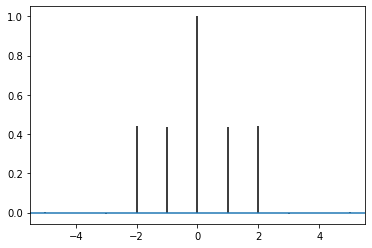

In [218]:
w = np.random.randn(10002)

eps1 = (w[:-2] + 2*w[2:])
wnew = w[:-1]
eps2 = (wnew[:-1] + wnew[1:])
eps = eps1 + eps2

plt.acorr(eps, maxlags = 5)

## Problem 4: Assumptions for Linear Regression

There are five files available for download on github with this homework, HW7a.csv, HW7b.csv, HW7c.csv, HW7d.csv, and HW7e.csv. They each contain n = 100 rows of data. Each row, i = 1,...,100, contains two entries: Y_i, and X_i. 

For each of the 5 files, do the following:
* load the data from the file
* fit the linear model to the data
* plot Y vs X
* plot the residuals of the fitted model (epsilon) against X
* plot the absolute value of the residuals
* create a normal Q-Q plot o the residuals

For each of the four assumptions for linear regression, state whether each dataset abides or does not abide by each and why. The assumptions are that the residuals:
* are mutual independence
* are independent of the covariates
* are normally distributed
* have constant variance



In [4]:
dfa = pd.read_csv('HW7a.csv')
dfb = pd.read_csv('HW7b.csv')
dfc = pd.read_csv('HW7c.csv')
dfd = pd.read_csv('HW7d.csv')
dfe = pd.read_csv('HW7e.csv')

HW7a Ans: By the scatterplot, there doesn't seem to be a relationship between residuals, so they are likely mutually independent. The average residual value is not dependent on on the x value (average is ~0). When plotted against normal residuals, the plot is very close to a straight line, indicating normal distribution. The scatterplot of absolute residual does not widen/narrow depending on x, which indicates constant variance.



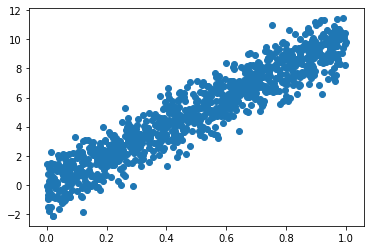

In [5]:
Xa = dfa['X']
Ya = dfa['Y']
modela = sm.OLS(Ya, Xa).fit()
YaHat = modela.predict(Xa)
residual_a = Ya - YaHat
plt.scatter(Xa, Ya)
plt.show()

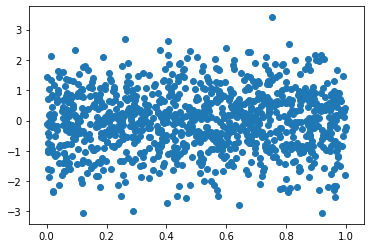

In [6]:
plt.scatter(Xa, residual_a)
plt.show()

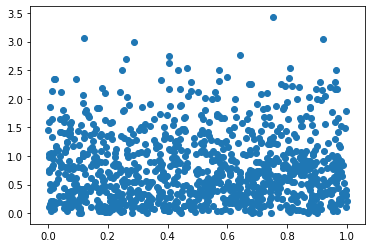

In [7]:
plt.scatter(Xa, np.abs(residual_a))
plt.show()

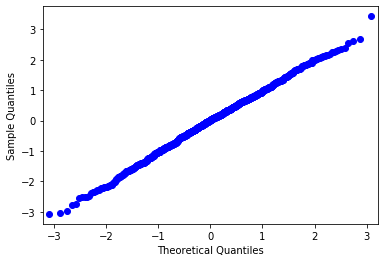

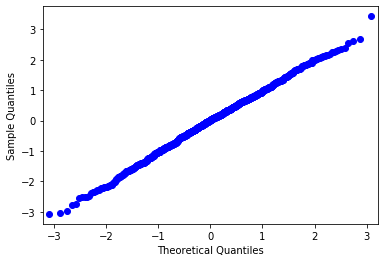

In [8]:
sm.qqplot(residual_a)

HW7b Ans: Many of the points seem very clustered for certain ranges of Y for each X, likely indicating the residuals are not mutually independent. The average residual decreases as x increases, indicating the residuals and covariates are dependent. The range of residuals is higher for smaller x values, meaning they likely don't have constant covariance. Finally, the QQ plot doesn't follow a straight line, indicating the residuals aren't normally distributed.


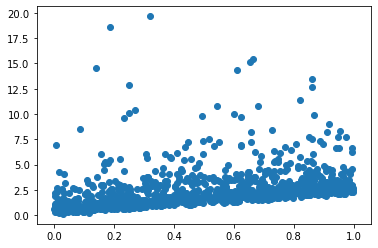

In [9]:
Xb = dfb['X']
Yb = dfb['Y']
modelb = sm.OLS(Yb, Xb).fit()
YbHat = modelb.predict(Xb)
residual_b = Yb - YbHat
plt.scatter(Xb, Yb)
plt.show()

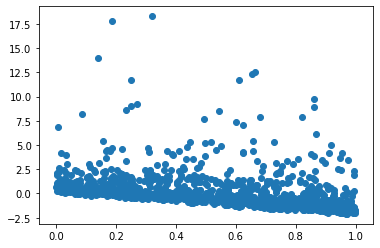

In [10]:
plt.scatter(Xb, residual_b)
plt.show()

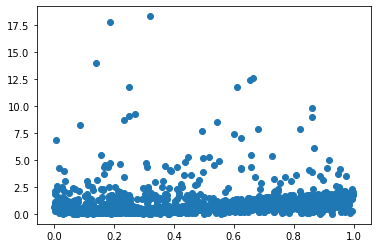

In [11]:
plt.scatter(Xb, np.abs(residual_b))
plt.show()

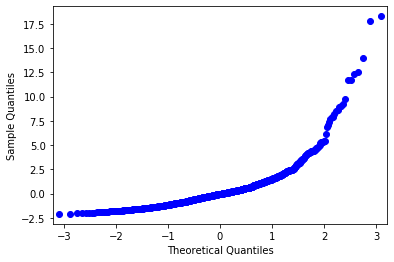

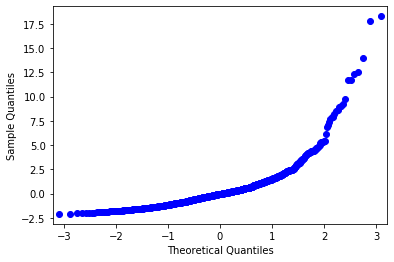

In [12]:
sm.qqplot(residual_b)

HW7c Ans: Residuals on X-Y plot seem evenly distributed, likely mutually indpeendent. Average of residuals doesn't seem to increase, so likely independent of covariates. Range of absolute residuals doesn't really increase over any x, so covariance is likely constant. Finally, the QQ plot shows a straight line, indicating normal distribution.

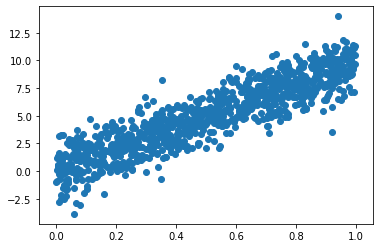

In [13]:
Xc = dfc['X']
Yc = dfc['Y']
modelc = sm.OLS(Yc, Xc).fit()
YcHat = modelc.predict(Xc)
residual_c = Yc - YcHat
plt.scatter(Xc, Yc)
plt.show()

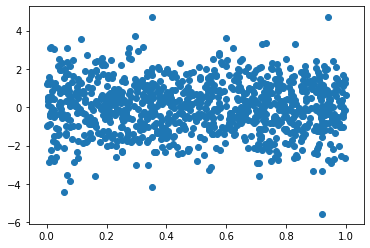

In [14]:
plt.scatter(Xc, residual_c)
plt.show()

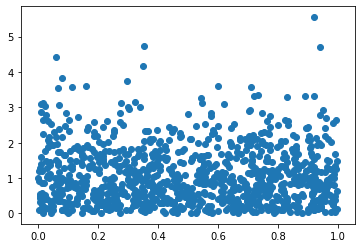

In [15]:
plt.scatter(Xc, np.abs(residual_c))
plt.show()

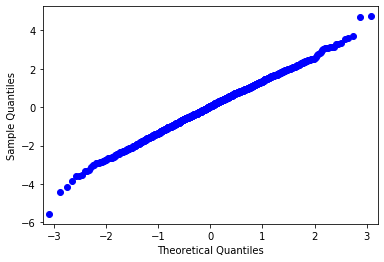

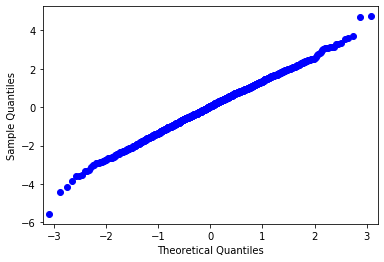

In [16]:
sm.qqplot(residual_c)

HW7d Ans: Scatterplot seems to maintain constant width, so residuals are likely mutually independent. Plot of residuals definetely has some relationship to the x value (almost parabolic shape, which affects average residual), so residuals are likely dependent on covariates. The absolute residual plot takes on some shape as well, indicating non-constant covariance. The QQ plot is fairly straight, so residuals might be normally distributed.

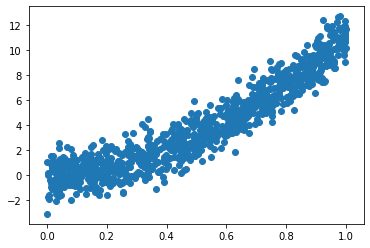

In [17]:
Xd = dfd['X']
Yd = dfd['Y']
modeld = sm.OLS(Yd, Xd).fit()
YdHat = modeld.predict(Xd)
residual_d = Yd - YdHat
plt.scatter(Xd, Yd)
plt.show()

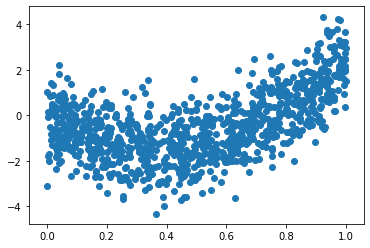

In [18]:
plt.scatter(Xd, residual_d)
plt.show()

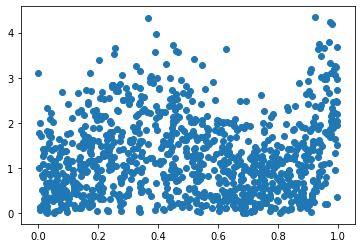

In [19]:
plt.scatter(Xd, np.abs(residual_d))
plt.show()

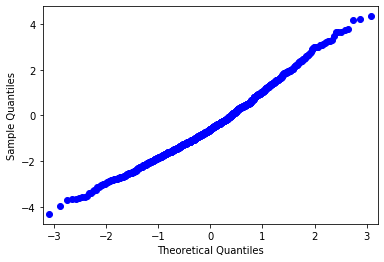

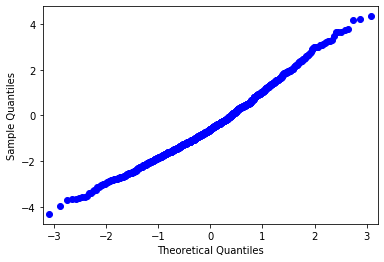

In [20]:
sm.qqplot(residual_d)

HW7e Ans: Scatterplot widens as x increases, so residuals are likely not mutually independent. Residual graph seems to maintain same average over the interval, so residuals could be independent of covariates. Absolute residual range increases as X increases, so they are unlikely to have constant covariance. The QQ plot has some curve to it, which means that the residuals are likely not normally distributed.

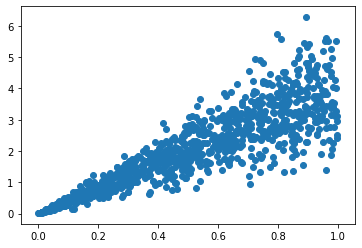

In [21]:
Xe = dfe['X']
Ye = dfe['Y']
modele = sm.OLS(Ye, Xe).fit()
YeHat = modele.predict(Xe)
residual_e = Ye - YeHat
plt.scatter(Xe, Ye)
plt.show()

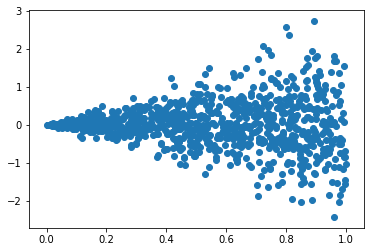

In [22]:
plt.scatter(Xe, residual_e)
plt.show()

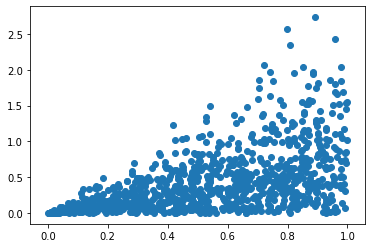

In [23]:
plt.scatter(Xe, np.abs(residual_e))
plt.show()

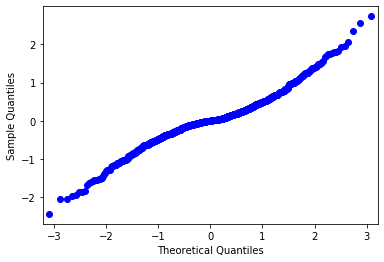

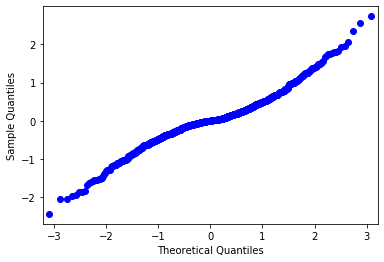

In [24]:
sm.qqplot(residual_e)

## Problem 5: SAT vs GPA

In this problem, we will try to understand how GPA and SAT scores are related. Start by importing the data set called 'SATvsGPA.csv', available on github. 

In [25]:
## Code here
sat_gpa = pd.read_csv('SATvsGPA.csv')
sat_gpa.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


a. Plot scatterplot with the SAT scores as the x-axis and the GPAs as the y-axis. 

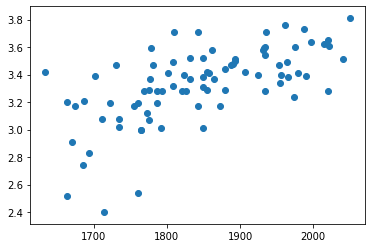

In [26]:
## Code here
x = sat_gpa['SAT']
y = sat_gpa['GPA']
plt.scatter(x,y)
plt.show()


b. Fit a linear model to the data, and plot it on top of the scatterplot.

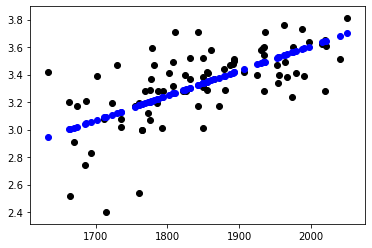

In [27]:
## Code here
model = sm.OLS(y, x).fit()
yhat = model.predict(x)

plt.scatter(x,y, color = 'black') #actual values in black
plt.scatter(x,yhat, color = 'blue') #predicted values in blue
plt.show()

c. Print out the model summary. What conclusions would you make about how GPA and SAT scores are related based on this model? Use the statistics in the model summary to justify these conclusions. 

In [28]:
#Code Here
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    GPA   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.120e+04
Date:                Sun, 19 Apr 2020   Prob (F-statistic):                   9.38e-102
Time:                        21:06:19   Log-Likelihood:                          12.440
No. Observations:                  84   AIC:                                     -22.88
Df Residuals:                      83   BIC:                                     -20.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SAT            0.0018   1.24e-05    145.594      0.000       0.002       0.002
==============================================================================
Omnibus:                        9.848   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.422
Skew:                          -0.594   Prob(JB):                      0.00331
Kurtosis:                       4.361   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ans: Considering the R-squared, F-statistic and Prob(F-stat) values, GPA and SAT scores are likely related. The r-squared value is extremely close to 1, indicating a strong positive association. Furthermore, the F-statistic is very high, and the probability of such a high value is virtually zero, so Y is very likely related to the coefficients of the linear regression. 

## Problem 6: Multiple Linear Regression and Understanding p-values

In this problem, we will try to predict the energy used by appliances based on the temperature in and humidity of various rooms of a house and the outside weather conditions. We will use 'energydata.csv' file posted on github. The full dataset and descriptions of the columns can be found [here](http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction#). Please use the data posted on github for analysis as we have removed some columns and filtered the data. 

a. Begin by loading the data. Display the names of the columns and the first 5 rows. (It is often a good idea to display column names and a few rows to make sure you understand what is included in the data you imported.)

In [31]:
#Code Here
energy = pd.read_csv('energydata.csv')
energy.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,19.890000,47.596667,19.200000,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,18.20,48.900000,17.033333,45.530,6.6,733.5,92.0,7.0,63.0,5.3
1,40,21.390000,44.560000,20.790000,43.863333,20.20,45.663333,20.633333,46.790000,19.200000,...,19.39,51.163333,16.890000,45.700,5.3,736.9,92.0,6.0,22.0,4.1
2,50,20.100000,46.363333,19.500000,44.790000,20.29,45.590000,19.760000,46.590000,18.500000,...,19.10,54.290000,17.100000,49.260,5.0,739.9,91.0,5.0,40.0,3.6
3,50,19.890000,46.766667,19.033333,44.500000,20.00,44.790000,20.133333,44.700000,18.033333,...,18.50,49.000000,17.050000,45.245,6.4,743.3,86.0,5.0,40.0,4.2
4,60,20.066667,42.833333,19.000000,42.418182,19.79,44.700000,19.260000,42.560000,17.600000,...,18.60,45.790000,17.100000,43.260,6.5,744.2,75.0,7.0,29.0,2.3


b. Use sm.OLS().fit to build a linear model. Print the model summary. 

In [60]:
#Code Here
x = energy[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 
           'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out']]
y = energy[['Appliances']]
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Appliances   R-squared (uncentered):                   0.531
Model:                            OLS   Adj. R-squared (uncentered):              0.513
Method:                 Least Squares   F-statistic:                              29.93
Date:                Sun, 19 Apr 2020   Prob (F-statistic):                    8.02e-74
Time:                        21:35:30   Log-Likelihood:                         -3284.7
No. Observations:                 549   AIC:                                      6609.
Df Residuals:                     529   BIC:                                      6695.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
T1             0.2573     11.229      0.023      0.982     -21.802      22.316
RH_1          12.4758      4.805      2.596      0.010       3.036      21.915
T2           -27.8394      9.959     -2.795      0.005     -47.404      -8.274
RH_2         -14.4603      5.129     -2.820      0.005     -24.535      -4.385
T3            31.5453      6.641      4.750      0.000      18.500      44.591
RH_3           7.1615      3.896      1.838      0.067      -0.492      14.815
T4            11.4413      5.823      1.965      0.050       0.002      22.880
RH_4           8.5769      3.851      2.227      0.026       1.011      16.143
T5           -11.9984      7.529     -1.594      0.112     -26.789       2.792
RH_5           0.6172      0.626      0.985      0.325      -0.613       1.848
T6             9.2182      4.034      2.285      0.023       1.294      17.142
RH_6           0.4648      0.413      1.124      0.261      -0.347       1.277
T7           -15.0944      7.986     -1.890      0.059     -30.782       0.593
RH_7          -2.5198      2.547     -0.989      0.323      -7.524       2.484
T8             7.0746      5.826      1.214      0.225      -4.371      18.520
RH_8          -5.9341      2.342     -2.534      0.012     -10.535      -1.333
T9             2.7497     10.905      0.252      0.801     -18.674      24.173
RH_9          -1.8503      2.661     -0.695      0.487      -7.079       3.378
T_out        -10.4363      4.599     -2.269      0.024     -19.471      -1.402
RH_out        -1.4754      0.742     -1.988      0.047      -2.933      -0.018
==============================================================================
Omnibus:                      435.396   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7236.538
Skew:                           3.465   Prob(JB):                         0.00
Kurtosis:                      19.381   Cond. No.                         613.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c. What do the Adj $R^2$ and F-statistic tell you about your model? Which inputs are significant at the $\alpha=0.05$ level?


Ans: The adjusted R-squared value tells us that a linear model encorperating all temperatures and humidities doesn't fit/predict the data well given its low value of 0.513. However, the very high F-statistic indicates that our outcome y is very likely related to at least one of our coefficients.

The inputs significant at an alpha level of 0.05 are: RH_1, T2, RH_2, T3, T4 (could change based on > or >= alpha), RH_4, RH_8, T_out and RH_out.

d. You decide you want a model with only 5 features. Build a new model with the five features that had the smallest p-values in the previous model. Which features do you select?

In [61]:
#Code Here
x = energy[['RH_1', 'T2', 'RH_2', 'T3', 'RH_8']]
y = energy[['Appliances']]
model = sm.OLS(y,x).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Appliances   R-squared (uncentered):                   0.489
Model:                            OLS   Adj. R-squared (uncentered):              0.484
Method:                 Least Squares   F-statistic:                              104.1
Date:                Sun, 19 Apr 2020   Prob (F-statistic):                    6.10e-77
Time:                        21:43:25   Log-Likelihood:                         -3308.2
No. Observations:                 549   AIC:                                      6626.
Df Residuals:                     544   BIC:                                      6648.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RH_1          19.6565      3.124      6.293      0.000      13.520      25.792
T2           -16.2112      4.918     -3.297      0.001     -25.871      -6.551
RH_2         -13.8212      3.091     -4.472      0.000     -19.892      -7.750
T3            15.3860      4.516      3.407      0.001       6.515      24.257
RH_8          -3.5040      1.323     -2.649      0.008      -6.103      -0.905
==============================================================================
Omnibus:                      465.987   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9015.299
Skew:                           3.771   Prob(JB):                         0.00
Kurtosis:                      21.364   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ans: Based on the previous question, we would select RH_1, T2, RH_2, T3, and RH_8 since they had the five smallest p-values.  

e. What do the p-values tell you about you about your new model? 

Ans: The p-values are extremely low -- well below our alpha level -- which indicates that there is likely a significant relationship between the predictor variables and energy levels.